### Regressão Linear Múltipla - Previsão de Consumo de Combustível de Carros ###

1. Contexto de Cenário 

Uma montadora de automóveis está interessada em entender como diferentes características de um carro (como potência, peso e cilindrada) afetam seu consumo de combustível (medido em Milhas por Galão - MPG). Eles querem um modelo que possa prever o MPG de novos designs de veículos antes mesmo de serem construídos. 

2. Objetivo 

Construir um modelo de regressão linear múltipla para prever o consumo de combustível (MPG - Milhas por Galão) de um carro (variável dependente) com base em múltiplas características como cilindrada ( displacement ), potência ( horsepower ) e peso ( weight ) (variáveis independentes). 

3. dfset Utilizado 

Simulamos um pequeno dfset com base nas características do  dfset "Auto MPG"

https://www.kaggle.com/dfsets/uciml/autompg-dfset

4. Voce deve fazer a proporção de treinamento vs teste.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [20]:
import pandas as pd 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [21]:
# Importando a base de vendas
base = pd.read_csv("./auto-mpg.csv")

df = pd.DataFrame(base) 
print('dfset gerado (primeiras 5 linhas):') 
print(df.head())
# tirando os nulos
df = df.dropna()



dfset gerado (primeiras 5 linhas):
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


### Apresentar os valores de performace ### 

MSE ≈ 0 → O modelo está muito bom (as previsões estão muito próximas dos valores reais).

Quanto menor o MSE, melhor. Mas quão pequeno depende dos seus dados.

O R² indica que aproximadamente o percentual da variância no MPG pode ser explicada pelas variáveis independentes no modelo, o que é um bom resultado para este dataset. 


In [30]:
from sklearn.linear_model import LinearRegression

X = ['displacement', 'horsepower', 'weight']
Y = 'mpg'

df[X] = df[X].dropna()
df[Y] = df[Y].dropna()

modelo = LinearRegression()
modelo.fit(df[X], df[Y])

#visualizando os coeficientes
print(modelo.coef_) #coeficiente é o gap entre as informações
print(modelo.intercept_) #intercepto é o desvio padrão

KeyError: 'mpg'

[14.07590824]


c:\Users\biancaveloso-ieg\OneDrive - Instituto Germinare\G Tech\AnaliseDeDados\venv1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\biancaveloso-ieg\OneDrive - Instituto Germinare\G Tech\AnaliseDeDados\venv1\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


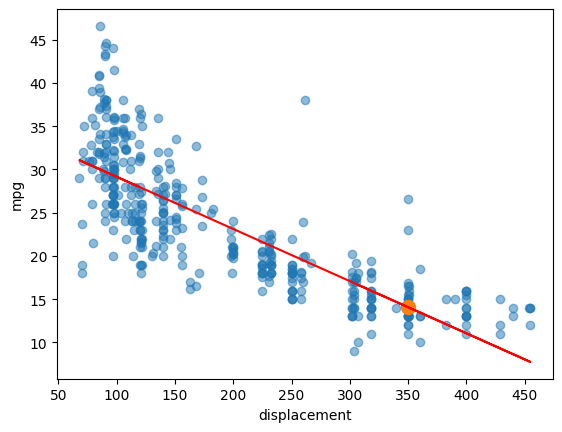

In [23]:
print(modelo.predict([[350]]))

plt.Figure(figsize=(10, 6))
plt.scatter(df['displacement'], df['mpg'], alpha=0.5)
plt.scatter(350, modelo.predict([[350]]), s=100, label='Predição para 350')

x = np.array(df['displacement'])
y = modelo.intercept_ + (x * modelo.coef_)

plt.plot(x, y, "r")

plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show() 